### Imports

In [1]:
import os
import tables            as tb
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

from antea  .io.mc_io    import load_configuration
from astropy.coordinates import Angle

## Required time of the simulation
#### From the log file, the following information has been taken

In [2]:
## NEXUS initial file
time_starting_sim1  = Angle('16h57m12s')
time_finishing_sim1 = Angle('18h7m28s')
sim_time1 = time_finishing_sim1 - time_starting_sim1
print('NEXUS initial file:')
print('Total time required simulation 1: ', round(sim_time1.hour * 60, 2), ' min')
print('')

## NEXUS only save charge above threshold (2 pes)
time_starting_sim2  = Angle('19h35m37s')
time_finishing_sim2 = Angle('20h53m18s')
sim_time2 = time_finishing_sim2 - time_starting_sim2
print('NEXUS only save charge above threshold (2 pes):')
print('Total time required simulation 2: ', round(sim_time2.hour * 60, 2), ' min')
print('')

## NEXUS only save charge above threshold (2 pes) and without the true info
#time_starting_sim3  = Angle('10h19m48s')
#time_finishing_sim3 = Angle('11h31m40s')
#sim_time3 = time_finishing_sim3 - time_starting_sim3
#print('NEXUS only save charge above threshold (2 pes) and without true info:')
#print('Total time required simulation 3: ', round(sim_time3.hour * 60, 2), ' min')

time_starting_sim3  = Angle('18h52m57s')
time_finishing_sim3 = Angle('20h12m16s')
sim_time3 = time_finishing_sim3 - time_starting_sim3
print('NEXUS only save charge above threshold (2 pes) and without true info:')
print('Total time required simulation 3: ', round(sim_time3.hour * 60, 2), ' min')

NEXUS initial file:
Total time required simulation 1:  70.27  min

NEXUS only save charge above threshold (2 pes):
Total time required simulation 2:  77.68  min

NEXUS only save charge above threshold (2 pes) and without true info:
Total time required simulation 3:  79.32  min


## Size of the different files

In [4]:
path  = '/data5/users/carmenromo/testing_nexus/data_ring/'
file1 = path+'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test1.100.pet.h5'
file2 = path+'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test2.100.pet.h5'
#file3 = path+'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test2.1003.pet.h5'
file3 = path+'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test2.2002.pet.h5'

total_size1 = os.path.getsize(file1)/1e6
total_size2 = os.path.getsize(file2)/1e6
total_size3 = os.path.getsize(file3)/1e6

h5conf1     = load_configuration(file1)
h5conf2     = load_configuration(file2)
h5conf3     = load_configuration(file3)
saved_evts1 = int(h5conf1[h5conf1.param_key=='saved_events'].param_value.values[0])
saved_evts2 = int(h5conf2[h5conf2.param_key=='saved_events'].param_value.values[0])
saved_evts3 = int(h5conf3[h5conf3.param_key=='saved_events'].param_value.values[0])

print('NEXUS initial file:')
print(f"{round(total_size1, 2)} Mb (15000 events simulated, {saved_evts1} saved)")
print('')
print('NEXUS only save charge above threshold (2 pes):')
print(f"{round(total_size2, 2)} Mb (15000 events simulated, {saved_evts2} saved)")
print('')
print('NEXUS only save charge above threshold (2 pes) and without true info:')
print(f"{round(total_size3, 2)} Mb (15000 events simulated, {saved_evts3} saved)")
print('')

ratio1 = 1 - total_size2/total_size1
ratio2 = 1 - total_size3/total_size1

print(f"New file is {round(ratio1, 2)}% lighter")
print(f"New new file is {round(ratio2, 2)}% lighter")

NEXUS initial file:
280.91 Mb (15000 events simulated, 7007 saved)

NEXUS only save charge above threshold (2 pes):
232.68 Mb (15000 events simulated, 7007 saved)

NEXUS only save charge above threshold (2 pes) and without true info:
97.28 Mb (15000 events simulated, 7007 saved)

New file is 0.17% lighter
New new file is 0.65% lighter


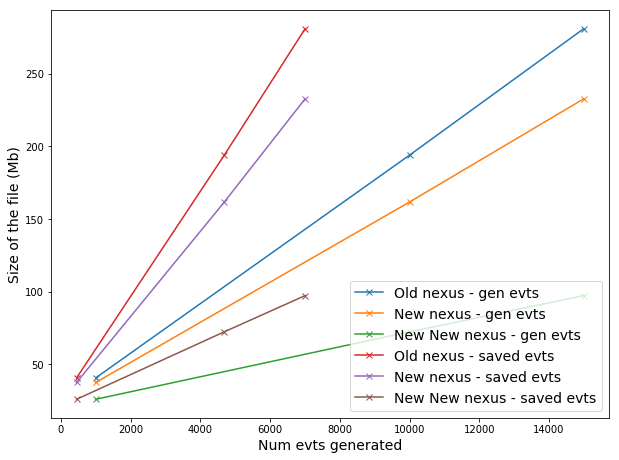

0.8282931479211731
0.9226155052380008
0.8336906989913822


In [6]:
file4 = path+'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test1.1001.pet.h5'
file5 = path+'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test2.1001.pet.h5'
file6 = path+'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test1.1002.pet.h5'
file7 = path+'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test2.1002.pet.h5'
#file8 = path+'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test2.1004.pet.h5'
#file9 = path+'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test2.1005.pet.h5'
file8 = path+'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test2.2001.pet.h5'
file9 = path+'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test2.2000.pet.h5'

total_size4 = os.path.getsize(file4)/1e6
total_size5 = os.path.getsize(file5)/1e6
total_size6 = os.path.getsize(file6)/1e6
total_size7 = os.path.getsize(file7)/1e6
total_size8 = os.path.getsize(file8)/1e6
total_size9 = os.path.getsize(file9)/1e6

h5conf4     = load_configuration(file4)
h5conf6     = load_configuration(file6)
saved_evts4 = int(h5conf4[h5conf4.param_key=='saved_events'].param_value.values[0])
saved_evts6 = int(h5conf6[h5conf6.param_key=='saved_events'].param_value.values[0])

sizes1 = np.array([total_size4, total_size6, total_size1])
sizes2 = np.array([total_size5, total_size7, total_size2])
sizes3 = np.array([total_size9, total_size8, total_size3])
gen_evts = np.array([1000, 10000, 15000])
sav_evts = np.array([saved_evts4, saved_evts6, saved_evts1])


fig = plt.figure(1)
fig.set_figwidth(10.)
fig.set_figheight(7.5)
plt.plot(gen_evts, sizes1, marker='x', label='Old nexus - gen evts')
plt.plot(gen_evts, sizes2, marker='x', label='New nexus - gen evts')
plt.plot(gen_evts, sizes3, marker='x', label='New New nexus - gen evts')
plt.plot(sav_evts, sizes1, marker='x', label='Old nexus - saved evts')
plt.plot(sav_evts, sizes2, marker='x', label='New nexus - saved evts')
plt.plot(sav_evts, sizes3, marker='x', label='New New nexus - saved evts')
plt.xlabel('Num evts generated',    fontsize=14)
plt.ylabel('Size of the file (Mb)', fontsize=14)
plt.legend(fontsize=14)
plt.show()

print(total_size2/total_size1)
print(total_size5/total_size4)
print(total_size7/total_size6)

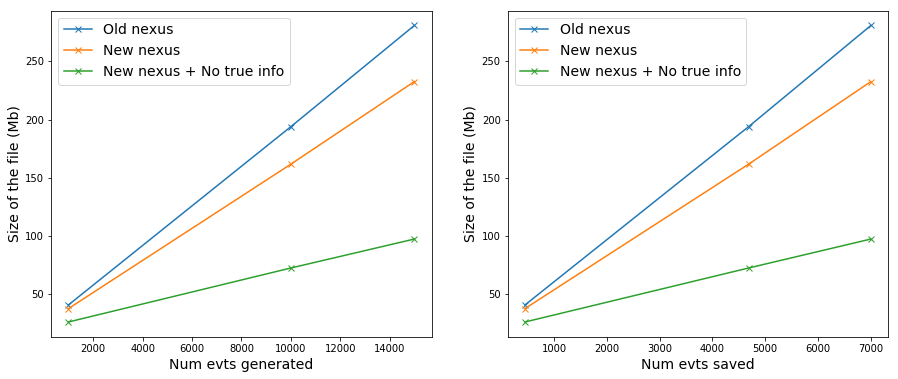

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.plot(gen_evts, sizes1, marker='x', label='Old nexus')
ax1.plot(gen_evts, sizes2, marker='x', label='New nexus')
ax1.plot(gen_evts, sizes3, marker='x', label='New nexus + No true info')
ax2.plot(sav_evts, sizes1, marker='x', label='Old nexus')
ax2.plot(sav_evts, sizes2, marker='x', label='New nexus')
ax2.plot(sav_evts, sizes3, marker='x', label='New nexus + No true info')
ax1.set_xlabel('Num evts generated',    fontsize=14)
ax1.set_ylabel('Size of the file (Mb)', fontsize=14)
ax1.legend(fontsize=14)
ax2.set_xlabel('Num evts saved',    fontsize=14)
ax2.set_ylabel('Size of the file (Mb)', fontsize=14)
ax2.legend(fontsize=14)
plt.show()

### Check that the initial file extracting charges below threshold is equal to the new file

In [8]:
from antea.io.mc_io import load_mcsns_response
from antea.io.mc_io import load_mcTOFsns_response
from antea.io.mc_io import load_mcparticles

In [9]:
sns_response1 = load_mcsns_response(file1)
sns_response2 = load_mcsns_response(file2)
sns_response3 = load_mcsns_response(file3)

In [10]:
df_above_thr1 = sns_response1[sns_response1.charge > 2].reset_index()
df_above_thr1 = df_above_thr1.drop('index', axis=1)

assert len(df_above_thr1) == len(sns_response2)
print(df_above_thr1.equals(sns_response2))

True


In [11]:
print(sns_response2.charge.equals(sns_response3.charge))

True


### Plot the results:

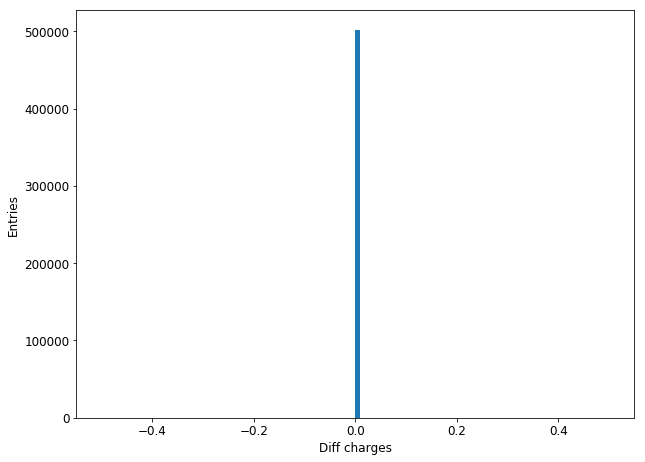

In [12]:
sub_charges = df_above_thr1.charge - sns_response2.charge

plt.rcParams["font.size"] = 12
fig = plt.figure(1)
fig.set_figwidth(10.)
fig.set_figheight(7.5)
plt.hist(sub_charges, 100)
plt.xlabel('Diff charges')
plt.ylabel('Entries')
plt.show()

## TOF:

In [13]:
sns_response_tof1 = load_mcTOFsns_response(file1)
sns_response_tof2 = load_mcTOFsns_response(file2)
sns_response_tof3 = load_mcTOFsns_response(file3)

In [14]:
print(len(sns_response_tof1))
print(len(sns_response_tof2))
print(len(sns_response_tof3))

5351188
4018274
4018274


In [15]:
sns_response_tof2.head()

,event_id,sensor_id,time_bin,charge
0,1500000,-1330,796,1
1,1500000,-1330,1762,1
2,1500000,-1330,2202,1
3,1500000,-1330,4255,1
4,1500000,-1330,5332,1


In [16]:
sns_response_tof3.head()

,event_id,sensor_id,time_bin,charge
0,30030000,-1330,796,1
1,30030000,-1330,1762,1
2,30030000,-1330,2202,1
3,30030000,-1330,4255,1
4,30030000,-1330,5332,1


In [16]:
particles2 = load_mcparticles(file2)
events2    = particles2.event_id.unique()
for evt in events2:
    waveforms2     = sns_response2[sns_response2.event_id == evt]
    sipms2         = waveforms2.sensor_id.values
    
    tof_waveforms2 = sns_response_tof2[sns_response_tof2.event_id == evt].reset_index()
    tof_waveforms2 = tof_waveforms2.drop('index', axis=1)
    
    tof_waveforms1 = sns_response_tof1[sns_response_tof1.event_id == evt]
    sipms_tof1     = tof_waveforms1.sensor_id.values
    tof_waveforms1 = tof_waveforms1[np.isin(-sipms_tof1, sipms2)].reset_index()
    tof_waveforms1 = tof_waveforms1.drop('index', axis=1)
    print(tof_waveforms1.equals(tof_waveforms2))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [17]:
print(sns_response_tof2.charge.equals(sns_response_tof3.charge))

True
